## Import Packages

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('ggplot')

## Load dataset

In [5]:
df=pd.read_csv('Mall_Customers.csv')

## Basic Exploration to get better understanding of the dataset

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


data check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.shape

(200, 5)

> droping uninformative column(CustomerID) and set it as index 

> No null value based on info


> check to see if any duplicate value exist

In [10]:
df.set_index("CustomerID", inplace=True)

In [11]:
df.columns = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [12]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
AnnualIncome,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [15]:
df.sort_values(by="AnnualIncome")[-10:]

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
191,Female,34,103,23
192,Female,32,103,69
193,Male,33,113,8
194,Female,38,113,91
195,Female,47,120,16
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18


In [16]:
x=df.groupby(['Gender'])['Gender'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
mf_ratio

Gender,Female,Male
Gender,0.56,0.44


it seems there is some outliers at AnnualIncome from #195

## Exploratory Data Analysis

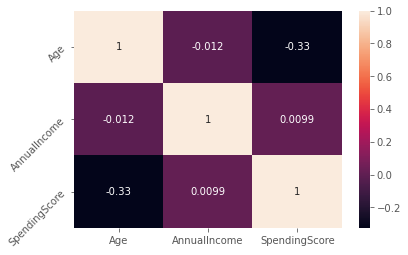

In [17]:
fig = plt.figure()
sns.heatmap(df.corr(), annot=df.corr())
plt.yticks(rotation=45)
plt.show()

there is not a highly correlated features, the most is between age and spendingscore(negative)

/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

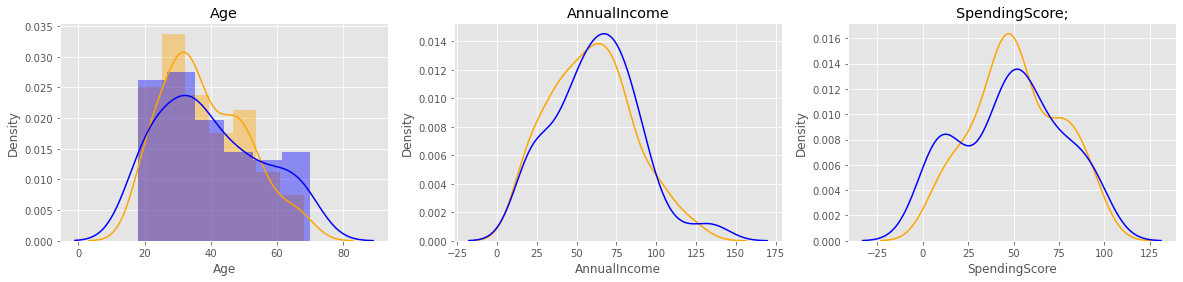

In [18]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df.Age[df['Gender']=='Female'], color='orange', hist=True, kde=True, label='Female')
sns.distplot(df.Age[df['Gender']=='Male'], color='blue', hist=True, kde=True, label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df.AnnualIncome[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.AnnualIncome[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('AnnualIncome')

plt.subplot(1,3,3)
sns.distplot(df.SpendingScore[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.SpendingScore[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('SpendingScore;')

plt.show()

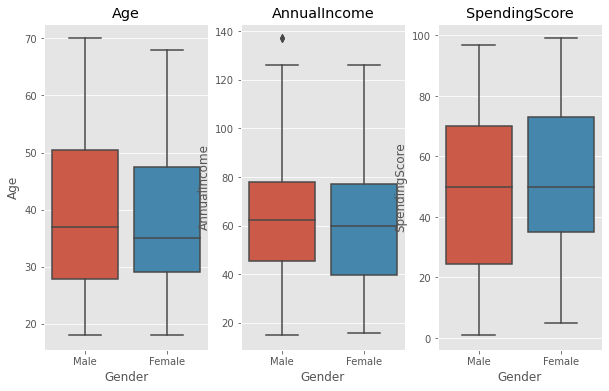

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=df.Gender, y=df.AnnualIncome)
plt.title('AnnualIncome')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df.SpendingScore)
plt.title('SpendingScore')

plt.show()

The left plot indicates wider age range in male and also higher average age.
by exploring at center and right plots, show even though men have slightly higher income but in terms of spending women spent slighty more than men

/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

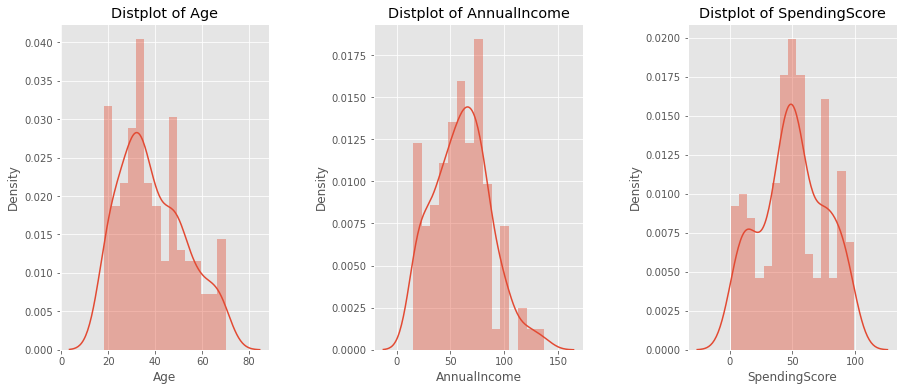

In [20]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

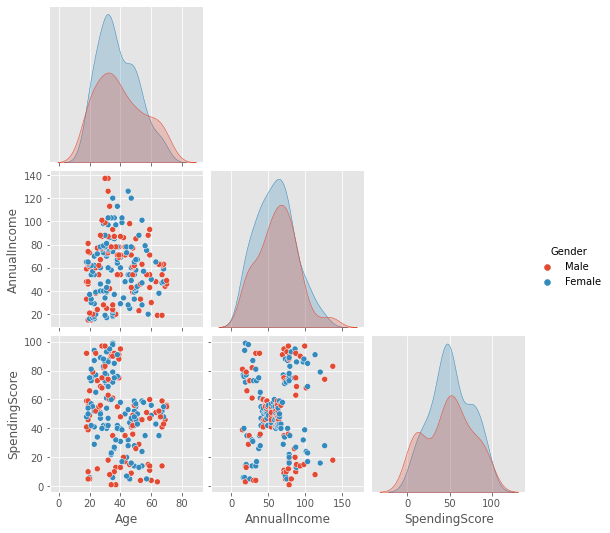

In [21]:
sns.pairplot(df, corner=True, vars = ['Age', 'AnnualIncome', 'SpendingScore'], hue = "Gender")

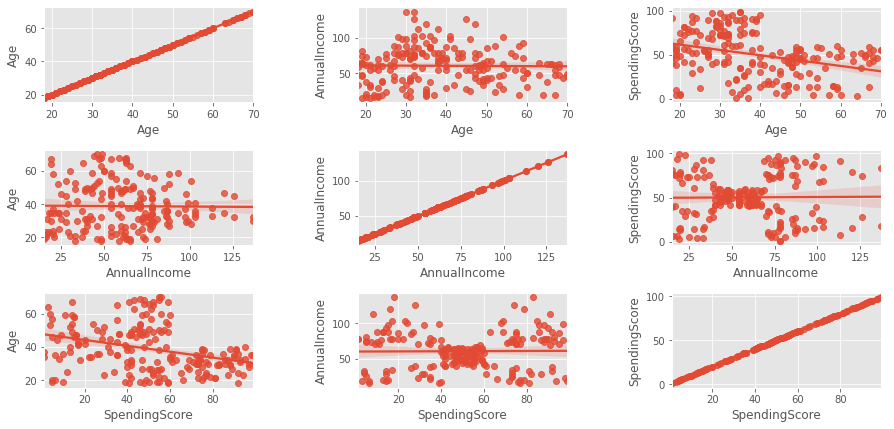

In [22]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'AnnualIncome' , 'SpendingScore']:
    for y in ['Age' , 'AnnualIncome' , 'SpendingScore']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

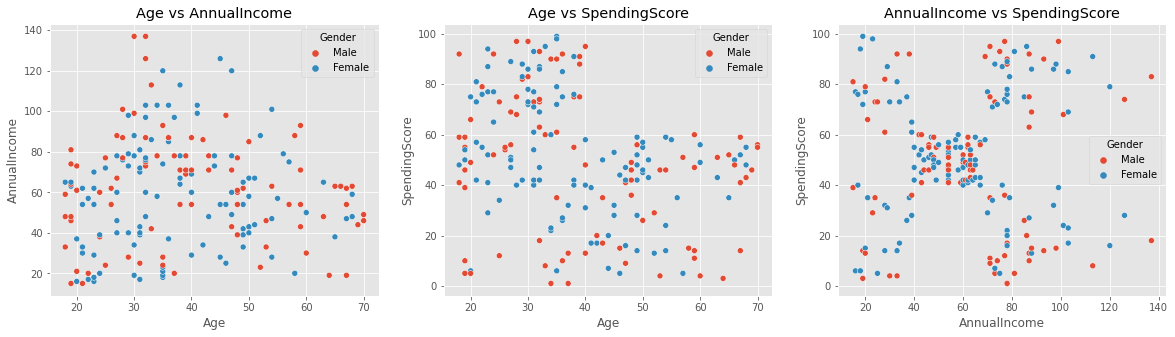

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age, y=df.AnnualIncome, hue=df.Gender)
plt.title('Age vs AnnualIncome')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age, y=df.SpendingScore, hue=df.Gender)
plt.title('Age vs SpendingScore')

plt.subplot(1,3,3)
sns.scatterplot(x=df.AnnualIncome, y=df.SpendingScore, hue=df.Gender)
plt.title('AnnualIncome vs SpendingScore')

plt.show()

Have you found something?
I did actually... you can see there seems to be 2 groups of customers by age vs score (top left quarter vs bottom right quarter), where diagonal is delimiting them.

What is more important is actually chart Income vs Score where we can see 5 different groups of customers (corners & center). What does it mean? We've probably found ideal way to cluster our customers based on income and score!

Also based on Annualincom vs SpendingScore, it is kind of a rabbit head, and indicates 5 groups


In [24]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [25]:
df1 = df.replace("Male", 0)
df1 = df1.replace("Female", 1)

### Standardization 

In [26]:
# scale, because clearly these are not on the same scale, and I want to ensure each variable has equal weight
sc_org = StandardScaler()
xs_org = sc_org.fit_transform(df1)
df_std = pd.DataFrame(xs_org, index=df1.index, columns=df1.columns)

## Hierarchical Clustering

In [27]:
dff2 = df.drop('Gender', axis=1)

# scale, because clearly these are not on the same scale, and I want to ensure each variable has equal weight
sc2 = StandardScaler()
xs2 = sc2.fit_transform(dff2)
dff2 = pd.DataFrame(xs2, index=dff2.index, columns=dff2.columns)

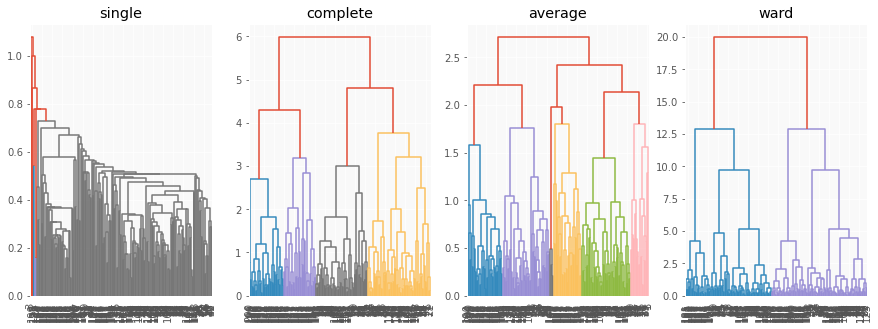

In [28]:
# hierarchical clustering--'single', 'complete', 'average', and 'ward' methods

METHODS = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(15,5))

for i, m in enumerate(METHODS):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(dff2, method=m),
             labels = dff2.index,
             leaf_rotation=90,
             leaf_font_size=10)
plt.show()

In [29]:
df_copy = df.copy()

# try to slice using the complete method
df_hccomp = linkage(df_std, method = 'complete')

# slice up clusters
df_hccomp4 = fcluster(df_hccomp, 4, criterion = 'distance')
df_copy['hccomp4'] = df_hccomp4
df_copy.hccomp4.value_counts()

3    65
1    39
5    35
4    32
2    29
Name: hccomp4, dtype: int64

In [30]:
# try to slice using the average method
df_hcavg = linkage(df_std, method = 'average')

# slice up clusters
df_hcavg2 = fcluster(df_hcavg, 2, criterion = 'distance')
df_copy['hcavg2'] = df_hcavg2
df_copy.hcavg2.value_counts()

4     44
2     32
5     23
11    22
1     21
9     18
7     16
3     15
10     5
8      2
6      2
Name: hcavg2, dtype: int64

In [31]:
# try to slice using the ward method
df_hcward = linkage(dff2, method = 'ward')

# slice up clusters
df_hcward15 = fcluster(df_hcward, 15, criterion = 'distance')
df_copy['hcward15'] = df_hcward15
df_copy.hcward15.value_counts()

2    105
1     95
Name: hcward15, dtype: int64

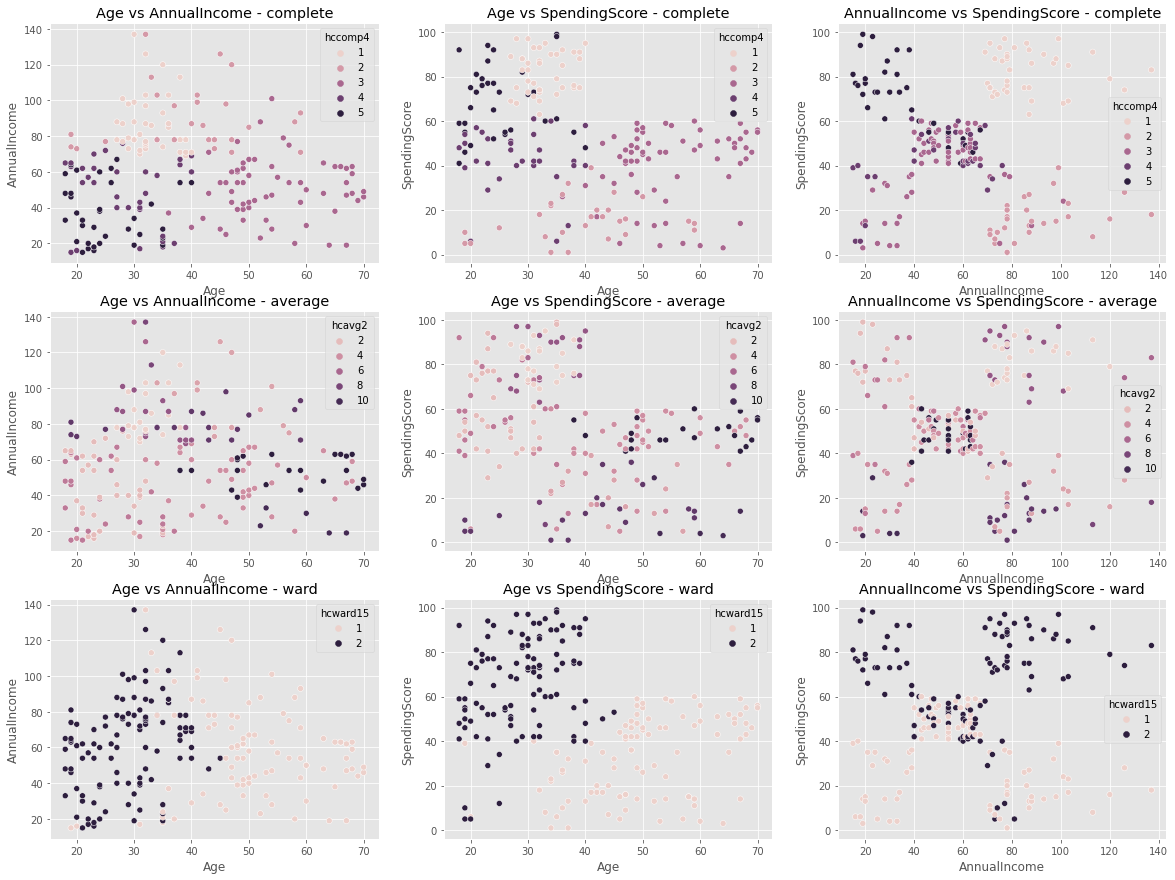

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.scatterplot(x=df_copy.Age, y=df_copy.AnnualIncome, hue=df_copy.hccomp4)
plt.title('Age vs AnnualIncome - complete')

plt.subplot(3,3,2)
sns.scatterplot(x=df_copy.Age, y=df_copy.SpendingScore, hue=df_copy.hccomp4)
plt.title('Age vs SpendingScore - complete')

plt.subplot(3,3,3)
sns.scatterplot(x=df_copy.AnnualIncome, y=df_copy.SpendingScore, hue=df_copy.hccomp4)
plt.title('AnnualIncome vs SpendingScore - complete')

plt.subplot(3,3,4)
sns.scatterplot(x=df_copy.Age, y=df_copy.AnnualIncome, hue=df_copy.hcavg2)
plt.title('Age vs AnnualIncome - average')

plt.subplot(3,3,5)
sns.scatterplot(x=df_copy.Age, y=df_copy.SpendingScore, hue=df_copy.hcavg2)
plt.title('Age vs SpendingScore - average')

plt.subplot(3,3,6)
sns.scatterplot(x=df_copy.AnnualIncome, y=df_copy.SpendingScore, hue=df_copy.hcavg2)
plt.title('AnnualIncome vs SpendingScore - average')

plt.subplot(3,3,7)
sns.scatterplot(x=df_copy.Age, y=df_copy.AnnualIncome, hue=df_copy.hcward15)
plt.title('Age vs AnnualIncome - ward')

plt.subplot(3,3,8)
sns.scatterplot(x=df_copy.Age, y=df_copy.SpendingScore, hue=df_copy.hcward15)
plt.title('Age vs SpendingScore - ward')

plt.subplot(3,3,9)
sns.scatterplot(x=df_copy.AnnualIncome, y=df_copy.SpendingScore, hue=df_copy.hcward15)
plt.title('AnnualIncome vs SpendingScore - ward')

plt.show()

In [33]:
df_copy.groupby('hccomp4').agg('mean').iloc[:, :3]

,Age,AnnualIncome,SpendingScore
hccomp4,,,
1,32.692308,86.538462,82.128205
2,39.620690,89.551724,15.758621
3,54.646154,50.615385,39.892308
4,28.468750,48.906250,42.250000
5,25.228571,36.714286,69.571429


In [34]:
df_copy.groupby('hcavg2').agg('mean').iloc[:, :3]

,Age,AnnualIncome,SpendingScore
hcavg2,,,
1,32.190476,86.047619,81.666667
2,25.250000,43.437500,60.718750
3,44.600000,92.333333,21.600000
4,48.045455,46.681818,40.659091
5,24.565217,39.217391,59.652174
6,31.000000,131.500000,78.500000
7,33.562500,81.562500,83.187500
8,32.500000,125.000000,13.000000
9,40.277778,80.722222,14.166667


In [35]:
df_copy.groupby('hcward15').agg('mean').iloc[:, :3]

,Age,AnnualIncome,SpendingScore
hcward15,,,
1,49.915789,59.063158,32.515789
2,28.838095,61.914286,66.200000


## K-Means Clustering

### 1. clusters with original dataset

In [36]:
df_std.head()

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,-1.128152,-1.424569,-1.738999,-0.434801
2,-1.128152,-1.281035,-1.738999,1.195704
3,0.886405,-1.352802,-1.700830,-1.715913
4,0.886405,-1.137502,-1.700830,1.040418
5,0.886405,-0.563369,-1.662660,-0.395980


In [37]:
# Kmeans
KS = range(2, 10)

# storage
inertia = []
silo = []

for k in KS:
  km = KMeans(k)
  km.fit(df_std)
  labs = km.predict(df_std)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(df_std, labs))

/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


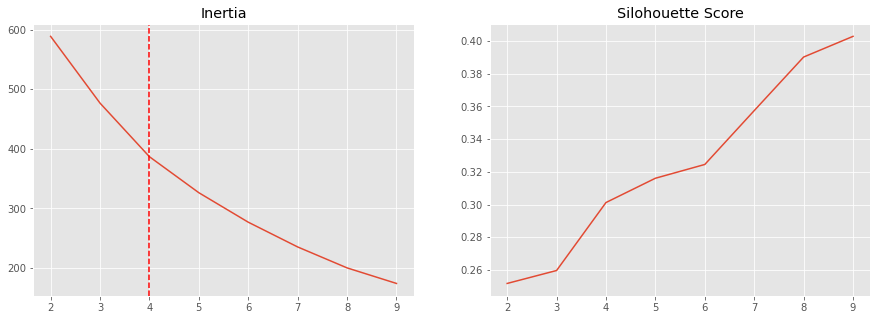

In [38]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)
plt.axvline(4, color="red", linestyle= '--')

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KS, silo)


plt.show();

### 2.Segmentation using Age and Spending Score

In [39]:
df2 = df_std[["Age", "SpendingScore"]]
df2.head()

,Age,SpendingScore
CustomerID,,
1,-1.424569,-0.434801
2,-1.281035,1.195704
3,-1.352802,-1.715913
4,-1.137502,1.040418
5,-0.563369,-0.395980


In [40]:
# Kmeans
KS = range(2, 10)

# storage
inertia = []
silo = []

for k in KS:
  km = KMeans(k)
  km.fit(df2)
  labs = km.predict(df2)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(df2, labs))

/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


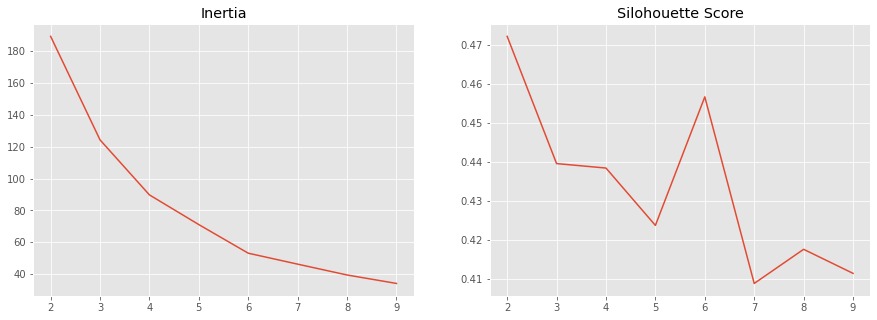

In [41]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)
# plt.axvline(4, color="red", linestyle= '--')

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KS, silo)


plt.show();

In [42]:
X1=df.iloc[:,[1,2,3]].values

In [43]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X1)

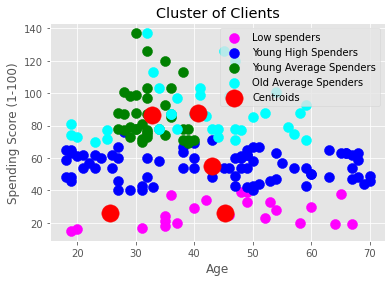

In [44]:
plt.scatter(X1[y_kmeans==0,0],X1[y_kmeans==0,1],s=100,c='magenta',label='Low spenders ')
plt.scatter(X1[y_kmeans==1,0],X1[y_kmeans==1,1],s=100,c='blue',label='Young High Spenders')
plt.scatter(X1[y_kmeans==2,0],X1[y_kmeans==2,1],s=100,c='green',label='Young Average Spenders')
plt.scatter(X1[y_kmeans==3,0],X1[y_kmeans==3,1],s=100,c='cyan',label='Old Average Spenders')
#plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
#plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='blue',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show
pass

So we can cluster the data into four groups.

1.Low spenders

2.Young High Spenders

3.Young Average Spenders

4.Old Average spenders

We can clearly see that Only young people(18-40 age group) are involved in High Spending.As age increases people fall into average or Low spending catogery.

In [45]:
for i, s in enumerate(silo[:10]):
  print(i+2,s) # +2 to align num clusters with value

2 0.4721271643062346
3 0.43952990002101927
4 0.4383860846531993
5 0.42369111306686563
6 0.4566283030197353
7 0.40882054201927515
8 0.4175670382589524
9 0.41140415502817795


In [46]:
# get the model
k6 = KMeans(6)
k6_labs = k6.fit_predict(df2)

# metrics
k6_silo = silhouette_score(df2, k6_labs)
k6_ssamps = silhouette_samples(df2, k6_labs)
np.unique(k6_labs)

array([0, 1, 2, 3, 4, 5], dtype=int32)

### 3.Segmentation using Annual Income and Spending Score

In [47]:
df3 = df_std[["AnnualIncome", "SpendingScore"]]
df3.head()

,AnnualIncome,SpendingScore
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


In [48]:
# scale, because clearly these are not on the same scale, and I want to ensure each variable has equal weight
sc = StandardScaler()
xs = sc.fit_transform(df3)
df3 = pd.DataFrame(xs, index=df3.index, columns=df3.columns)

In [49]:
# Kmeans
KS = range(2, 10)

# storage
inertia = []
silo = []

for k in KS:
  km = KMeans(k)
  km.fit(df3)
  labs = km.predict(df3)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(df3, labs))

/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


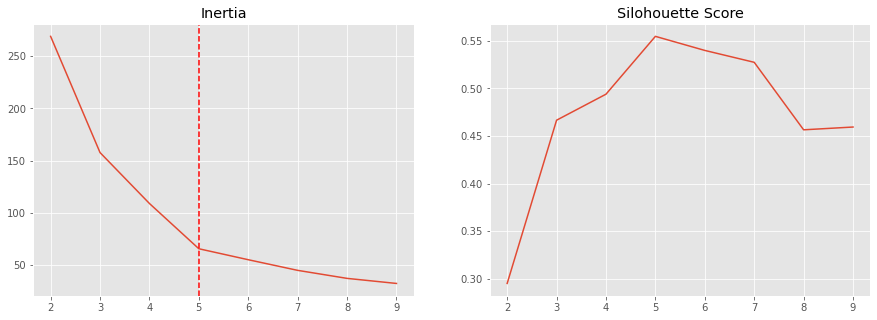

In [50]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KS, inertia)
plt.axvline(5, color="red", linestyle= '--')

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KS, silo)


plt.show();

In [51]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [53]:
X=df.iloc[:,[2,3]].values

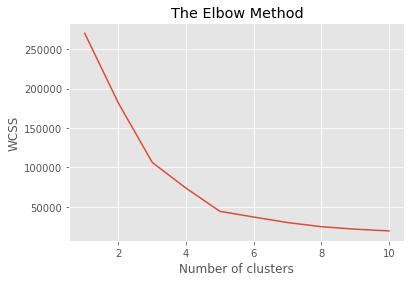

In [54]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

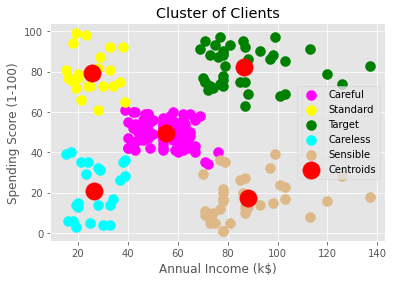

In [56]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show
pass

### Cluster 1- High income low spending =Careful

### Cluster 2- Medium income medium spending =Standard

### Cluster 3- High Income and high spending =Target

### Cluster 4- Low Income and high spending =Careless

### Cluster 5- Low Income and low spending =Sensible

### 4.Segmentation using Age and Income

In [57]:
X2=df.iloc[:,[1,2]].values

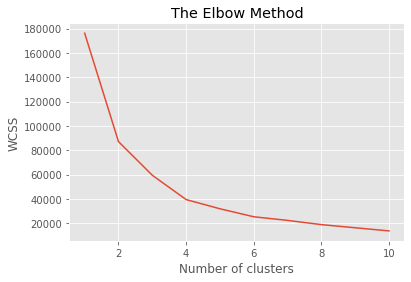

In [58]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X2)

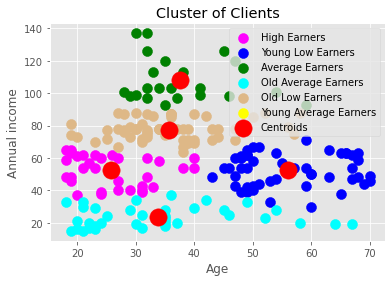

In [60]:
plt.scatter(X2[y_kmeans==0,0],X2[y_kmeans==0,1],s=100,c='magenta',label='High Earners ')
plt.scatter(X2[y_kmeans==1,0],X2[y_kmeans==1,1],s=100,c='blue',label='Young Low Earners')
plt.scatter(X2[y_kmeans==2,0],X2[y_kmeans==2,1],s=100,c='green',label='Average Earners')
plt.scatter(X2[y_kmeans==3,0],X2[y_kmeans==3,1],s=100,c='cyan',label='Old Average Earners')
plt.scatter(X2[y_kmeans==4,0],X2[y_kmeans==4,1],s=100,c='burlywood',label='Old Low Earners ')
plt.scatter(X2[y_kmeans==5,0],X2[y_kmeans==5,1],s=100,c='yellow',label='Young Average Earners')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Annual income')
plt.legend()
plt.ioff()
plt.show
pass

We can see people in age group 0f 30-40 have high number of high income people

### PCA

In [61]:
# scale, because clearly these are not on the same scale, and I want to ensure each variable has equal weight
sc = StandardScaler()
xs = sc.fit_transform(df1)
df_std = pd.DataFrame(xs, index=df1.index, columns=df1.columns)

In [62]:
pca = PCA(.9)
pca.fit(df_std)
pcs = pca.transform(df_std) #output is array, we can transforme it to DataFrame
pcs[:3]

array([[-0.40638272, -0.52071363, -2.07252663,  1.33552903],
       [-1.42767287, -0.3673102 , -2.27764369,  0.08232874],
       [ 0.05076057, -1.89406774, -0.36737523,  2.17438112]])

In [63]:
df_pca = pd.DataFrame(pcs)
df_pca.head() #all 4 components

,0,1,2,3
0,-0.406383,-0.520714,-2.072527,1.335529
1,-1.427673,-0.367310,-2.277644,0.082329
2,0.050761,-1.894068,-0.367375,2.174381
3,-1.694513,-1.631908,-0.717467,0.075228
4,-0.313108,-1.810483,-0.426460,0.683070


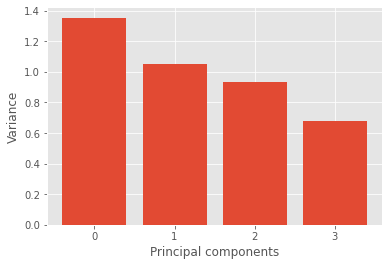

In [64]:
num_comp = range(pca.n_components_)
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_



plt.bar(num_comp, variance)
plt.xticks(num_comp)
plt.ylabel("Variance")
plt.xlabel("Principal components")
plt.show()

/Users/iroozbeh./opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


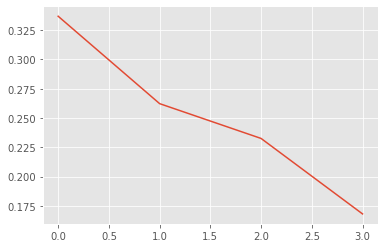

In [65]:
sns.lineplot(num_comp, variance_ratio)
plt.show();

 we have decided to keep all our components

In [66]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(df_pca)

In [67]:
df["labs"] = y_kmeans
df.head()

,Gender,Age,AnnualIncome,SpendingScore,labs
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,4
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


In [68]:
df.groupby("labs").describe()

Age                                                       AnnualIncome  \
     count       mean        std   min    25%   50%    75%   max        count   
labs                                                                            
0     56.0  28.392857   5.532314  18.0  23.00  29.5  32.00  40.0         56.0   
1     29.0  38.896552  10.519862  19.0  33.00  40.0  46.00  59.0         29.0   
2     28.0  57.214286   9.795529  35.0  48.75  59.0  66.25  70.0         28.0   
3     48.0  48.791667  10.189603  20.0  43.75  49.0  54.25  68.0         48.0   
4     39.0  28.410256   7.286317  18.0  21.50  28.0  34.50  40.0         39.0   

                 ...                SpendingScore                              \
           mean  ...     75%    max         count       mean        std   min   
labs             ...                                                            
0     60.428571  ...   78.00  120.0          56.0  68.178571  18.502194  29.0   
1     94.172414  ...  103.00  137.0          29.0  21.827586  18.729406   1.0   
2     46.785714  ...   61.25   71.0          28.0  38.714286  17.805237   3.0   
3     50.333333  ...   64.25   88.0          48.0  36.395833  16.938863   5.0   
4     58.230769  ...   76.00  101.0          39.0  70.717949  17.247347  39.0   

                               
        25%   50%   75%   max  
labs                           
0     51.75  73.0  83.5  99.0  
1     10.00  17.0  27.0  83.0  
2     33.50  46.0  51.0  60.0  
3     21.50  42.0  50.0  59.0  
4     55.50  73.0  89.0  97.0  

[5 rows x 24 columns]

In [69]:
dff = df.copy()

In [70]:
dff.labs.replace(4, "Highest", inplace=True)
dff.labs.replace(0, "High", inplace=True)
dff.labs.replace(2, "Average", inplace=True)
dff.labs.replace(3, "Low", inplace=True)
dff.labs.replace(1, "Lowest", inplace=True)

In [71]:
dff.groupby("labs").describe()

Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
labs                                                                  
Average  28.0  57.214286   9.795529  35.0  48.75  59.0  66.25  70.0   
High     56.0  28.392857   5.532314  18.0  23.00  29.5  32.00  40.0   
Highest  39.0  28.410256   7.286317  18.0  21.50  28.0  34.50  40.0   
Low      48.0  48.791667  10.189603  20.0  43.75  49.0  54.25  68.0   
Lowest   29.0  38.896552  10.519862  19.0  33.00  40.0  46.00  59.0   

        AnnualIncome             ...                SpendingScore             \
               count       mean  ...     75%    max         count       mean   
labs                             ...                                           
Average         28.0  46.785714  ...   61.25   71.0          28.0  38.714286   
High            56.0  60.428571  ...   78.00  120.0          56.0  68.178571   
Highest         39.0  58.230769  ...   76.00  101.0          39.0  70.717949   
Low             48.0  50.333333  ...   64.25   88.0          48.0  36.395833   
Lowest          29.0  94.172414  ...  103.00  137.0          29.0  21.827586   

                                                   
               std   min    25%   50%   75%   max  
labs                                               
Average  17.805237   3.0  33.50  46.0  51.0  60.0  
High     18.502194  29.0  51.75  73.0  83.5  99.0  
Highest  17.247347  39.0  55.50  73.0  89.0  97.0  
Low      16.938863   5.0  21.50  42.0  50.0  59.0  
Lowest   18.729406   1.0  10.00  17.0  27.0  83.0  

[5 rows x 24 columns]

In [72]:
clusters = ["Hieghest", "High", "Average", "Low", "lowest"]
distribution = [19.5, 28, 14, 24, 14.5]
dist = pd.DataFrame({"Clusters":clusters, "Distribution%": distribution})

In [73]:
dist

,Clusters,Distribution%
0,Hieghest,19.5
1,High,28.0
2,Average,14.0
3,Low,24.0
4,lowest,14.5


## tsne

In [74]:
tsne = TSNE() #always in real word n_components are 2
tsne.fit(pcs)

TSNE()

In [75]:
# get the embeddings
te = tsne.embedding_

#
# the shape
te.shape

(200, 2)

In [76]:
te_df = pd.DataFrame(te, columns=["A", "B"])
te_df.head()

,A,B
0,6.474837,-5.848226
1,6.533452,-4.114747
2,-8.260961,4.730555
3,-0.078430,4.950380
4,-6.681821,4.356534


<AxesSubplot:xlabel='A', ylabel='B'>

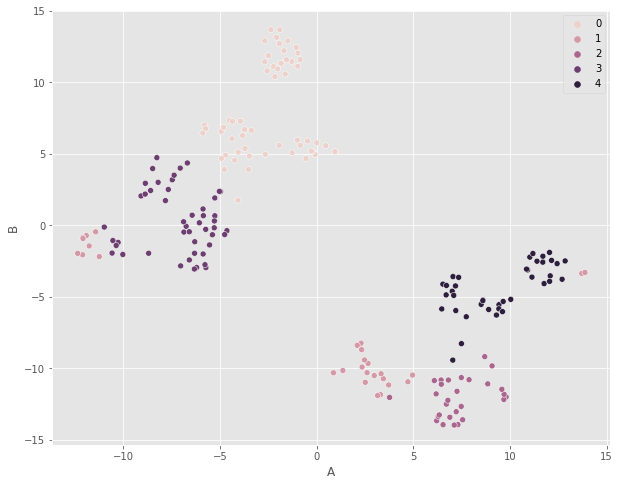

In [77]:
# PAL = sns.color_palette("bright", 10) 
plt.figure(figsize=(10, 8))
sns.scatterplot(x= "A" , y="B", hue=y_kmeans, data=te_df, legend="full")